#### About Data: 
Bloomington is nestled in the rolling hills of southern Indiana and home to 85,000 residents and serves as a home away from home for tens of thousands of Indiana University students and alumni.You'll cherish the city's dynamic energy, spectacular scenery, and outdoor activities, world-class educational opportunities, Big Ten sporting events, thriving local businesses, vibrant arts scene and unique shopping and dining experiences.

#### Business Problem:
1. What is exit rate? What are the causes and effect? 
Exit rate is the percentage of visitors to a page on the website from which they exit the website to a different website. 
2. What is bounce rate? What are the causes and effects? 
The percentage of visitors to a particular website who navigate away from the site after viewing only one page is called bounce rate. 

In [75]:
#import sf city dataset
import pandas as pd
import numpy as np

#Importing the excel file
df = pd.read_csv('bloomington.csv')

#Display the top 5 rows
df.head()

,Page,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value,New Avg. Time on Page
0,/animal-shelter/animals/Dog,"277,127","75,443",0:00:18,"15,811",30.54%,9.73%,$0.00,18
1,/animal-shelter/animals,"213,586","95,358",0:00:19,"39,854",10.93%,10.18%,$0.00,19
2,/,"135,918","92,954",0:00:30,"83,791",24.01%,25.60%,$0.00,30
3,/animal-shelter,"121,038","74,354",0:00:25,"68,324",9.95%,17.82%,$0.00,25
4,/animal-shelter/animals/Cat,"92,273","27,855",0:00:31,"6,407",32.47%,11.52%,$0.00,31


In [76]:
df['Bounce Rate'] = df['Bounce Rate'].str.replace('%', '') 

In [77]:
df['% Exit'] = df['% Exit'].str.replace('%', '')

In [78]:
df['Pageviews'] = df['Pageviews'].str.replace(',', '')

In [79]:
df['Unique Pageviews'] = df['Unique Pageviews'].str.replace(',', '')

In [80]:
df['Entrances'] = df['Entrances'].str.replace(',', '')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Page                   5000 non-null   object
 1   Pageviews              5000 non-null   object
 2   Unique Pageviews       5000 non-null   object
 3   Avg. Time on Page      5000 non-null   object
 4   Entrances              5000 non-null   object
 5   Bounce Rate            5000 non-null   object
 6   % Exit                 5000 non-null   object
 7   Page Value             5000 non-null   object
 8   New Avg. Time on Page  5000 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 351.7+ KB


In [82]:
df['% Exit'] = df['% Exit'].astype(float)
df['Pageviews'] = df['Pageviews'].astype(int)
df['Unique Pageviews'] = df['Unique Pageviews'].astype(int)
df['New Avg. Time on Page'] = df['New Avg. Time on Page'].astype(int)
df['Entrances'] = df['Entrances'].astype(int)
df['Bounce Rate'] = df['Bounce Rate'].astype(float)

In [83]:
df.head()

,Page,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value,New Avg. Time on Page
0,/animal-shelter/animals/Dog,277127,75443,0:00:18,15811,30.54,9.73,$0.00,18
1,/animal-shelter/animals,213586,95358,0:00:19,39854,10.93,10.18,$0.00,19
2,/,135918,92954,0:00:30,83791,24.01,25.60,$0.00,30
3,/animal-shelter,121038,74354,0:00:25,68324,9.95,17.82,$0.00,25
4,/animal-shelter/animals/Cat,92273,27855,0:00:31,6407,32.47,11.52,$0.00,31


In [84]:
df['Page Value'].value_counts()

$0.00     5000
Name: Page Value, dtype: int64

In [85]:
df =df.drop(['Page Value'], axis=1)

In [86]:
#Check the information about the dataset
#See if there are any null values in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Page                   5000 non-null   object 
 1   Pageviews              5000 non-null   int64  
 2   Unique Pageviews       5000 non-null   int64  
 3   Avg. Time on Page      5000 non-null   object 
 4   Entrances              5000 non-null   int64  
 5   Bounce Rate            5000 non-null   float64
 6   % Exit                 5000 non-null   float64
 7   New Avg. Time on Page  5000 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 312.6+ KB


In [87]:
#Lets bin the % Exit rate into 5 categories

conditionlist = [(df['% Exit']<=20),
                (df['% Exit']<=40),
                (df['% Exit']<=60),
                (df['% Exit']<=80),
                (df['% Exit']>80)]

exit_bin =['10-20','21-40','41-60','61-80','81+']
df['% Exit category'] = np.select(conditionlist,exit_bin, default='Not Specified')

df.head()

,Page,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,New Avg. Time on Page,% Exit category
0,/animal-shelter/animals/Dog,277127,75443,0:00:18,15811,30.54,9.73,18,10-20
1,/animal-shelter/animals,213586,95358,0:00:19,39854,10.93,10.18,19,10-20
2,/,135918,92954,0:00:30,83791,24.01,25.60,30,21-40
3,/animal-shelter,121038,74354,0:00:25,68324,9.95,17.82,25,10-20
4,/animal-shelter/animals/Cat,92273,27855,0:00:31,6407,32.47,11.52,31,10-20


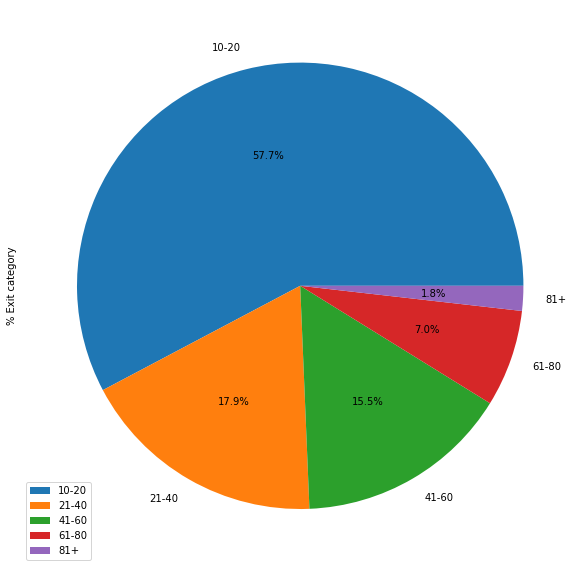

In [88]:
#Visualize Exit rate category

import matplotlib.pyplot as plt
df['% Exit category'].value_counts().plot(kind='pie',y='% Exit', legend=True, figsize=(10,15), autopct='%1.1f%%', explode=[0,0,0,0,0])

plt.show()

In [89]:
#K means clustering of Page Titles
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd 

#Page title pre processing, Use unicode for page title

clusters = df['Page'].values.astype('U')

vectorizer = TfidfVectorizer(stop_words='english', strip_accents='unicode')
features = vectorizer.fit_transform(clusters)


In [90]:
from sklearn.metrics import silhouette_score
# determining the maximum number of clusters
# using the simple method
limit = int((features.shape[0]//2)**0.5)
 
# determining number of clusters
# using silhouette score method
best_score = 0
best_k = 0
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(features)
    pred = model.predict(features)
    score = silhouette_score(features, pred)
    if score>best_score:
      best_score = score
      best_k = k
print('Silhouette best Score for k = {}: {:<.3f}'.format(best_k, best_score))

Silhouette best Score for k = 34: 0.075


In [91]:
#Decide the number of clusters

k = best_k
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)


df['Page title cluster'] = model.labels_

df.head(10)

,Page,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,New Avg. Time on Page,% Exit category,Page title cluster
0,/animal-shelter/animals/Dog,277127,75443,0:00:18,15811,30.54,9.73,18,10-20,5
1,/animal-shelter/animals,213586,95358,0:00:19,39854,10.93,10.18,19,10-20,5
2,/,135918,92954,0:00:30,83791,24.01,25.60,30,21-40,1
3,/animal-shelter,121038,74354,0:00:25,68324,9.95,17.82,25,10-20,28
4,/animal-shelter/animals/Cat,92273,27855,0:00:31,6407,32.47,11.52,31,10-20,5
5,/departments/hr/jobs,91617,56812,0:00:53,40744,60.27,46.78,53,41-60,14
6,/utilities/pay-bill,85934,63472,0:01:22,39897,68.47,69.14,82,61-80,1
7,/utilities,57761,41113,0:00:24,25262,16.33,12.32,24,10-20,1
8,/city,41859,24842,0:00:18,2762,14.84,7.39,18,10-20,4
9,/parks/facilities/frank-southern,41229,24361,0:01:04,23376,48.71,50.69,64,41-60,26


In [92]:
#how the machine chose to cluster the page titles
print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
clusters_dict = {}
for i in range(k):
    print("Cluster %d:" % i)
    temp_list = []
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
        temp_list.append(terms[j])
    clusters_dict[i] = temp_list 
    print('------------')

Cluster centroids: 

Cluster 0:
 asm_animalsearchform
 op
 form
 form_build_id
 species
 form_id
 dog
 search
 animals
 shelter
------------
Cluster 1:
 pdf
 media
 node
 utilities
 sanitation
 housing
 neighborhoods
 police
 application
 historic
------------
Cluster 2:
 news
 10
 08
 2018
 2017
 06
 04
 2016
 03
 16
------------
Cluster 3:
 vendors
 farmers
 market
 farms
 produce
 renaissance
 marchino
 barnhouse
 mccullough
 winkleplecks
------------
Cluster 4:
 city
 camps
 kid
 recreation
 holidays
 summer
 hall
 budget
 showers
 camp
------------
Cluster 5:
 animals
 shelter
 animal
 60443
 61033
 61049
 61048
 61044
 61042
 61041
------------
Cluster 6:
 departments
 index
 php
 legal
 public
 works
 police
 controller
 cfrd
 hand
------------
Cluster 7:
 3636
 node
 58869
 58870
 58871
 58872
 58874
 58875
 58877
 zsqbuhqhd4qefji5zekq5
------------
Cluster 8:
 documents
 viewdocument
 document_id
 php
 841
 271
 281
 6112
 az_index
 1747
------------
Cluster 9:
 engineering
 p

/Users/monishaperikala/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [93]:
print(clusters_dict)

{0: ['asm_animalsearchform', 'op', 'form', 'form_build_id', 'species', 'form_id', 'dog', 'search', 'animals', 'shelter'], 1: ['pdf', 'media', 'node', 'utilities', 'sanitation', 'housing', 'neighborhoods', 'police', 'application', 'historic'], 2: ['news', '10', '08', '2018', '2017', '06', '04', '2016', '03', '16'], 3: ['vendors', 'farmers', 'market', 'farms', 'produce', 'renaissance', 'marchino', 'barnhouse', 'mccullough', 'winkleplecks'], 4: ['city', 'camps', 'kid', 'recreation', 'holidays', 'summer', 'hall', 'budget', 'showers', 'camp'], 5: ['animals', 'shelter', 'animal', '60443', '61033', '61049', '61048', '61044', '61042', '61041'], 6: ['departments', 'index', 'php', 'legal', 'public', 'works', 'police', 'controller', 'cfrd', 'hand'], 7: ['3636', 'node', '58869', '58870', '58871', '58872', '58874', '58875', '58877', 'zsqbuhqhd4qefji5zekq5'], 8: ['documents', 'viewdocument', 'document_id', 'php', '841', '271', '281', '6112', 'az_index', '1747'], 9: ['engineering', 'projects', 'offic

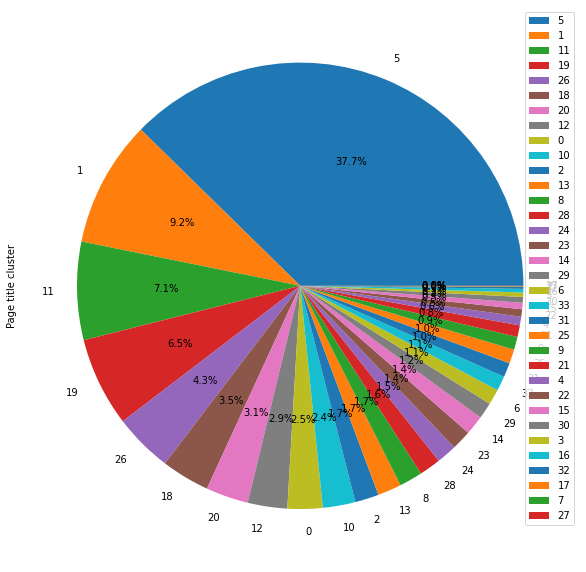

In [94]:
import matplotlib.pyplot as plt
df['Page title cluster'].value_counts().plot(kind='pie',y='% Exit category', legend=True, figsize=(10,15), autopct='%1.1f%%',
                                          explode =[0] * best_k)

plt.show()

In [95]:
#Create dummy variables for Page Title Cluster column 

df = pd.get_dummies(df, columns = ['Page title cluster'])
df.head()

,Page,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,New Avg. Time on Page,% Exit category,Page title cluster_0,...,Page title cluster_24,Page title cluster_25,Page title cluster_26,Page title cluster_27,Page title cluster_28,Page title cluster_29,Page title cluster_30,Page title cluster_31,Page title cluster_32,Page title cluster_33
0,/animal-shelter/animals/Dog,277127,75443,0:00:18,15811,30.54,9.73,18,10-20,0,...,0,0,0,0,0,0,0,0,0,0
1,/animal-shelter/animals,213586,95358,0:00:19,39854,10.93,10.18,19,10-20,0,...,0,0,0,0,0,0,0,0,0,0
2,/,135918,92954,0:00:30,83791,24.01,25.60,30,21-40,0,...,0,0,0,0,0,0,0,0,0,0
3,/animal-shelter,121038,74354,0:00:25,68324,9.95,17.82,25,10-20,0,...,0,0,0,0,1,0,0,0,0,0
4,/animal-shelter/animals/Cat,92273,27855,0:00:31,6407,32.47,11.52,31,10-20,0,...,0,0,0,0,0,0,0,0,0,0


## Predicting Exit Rate using Linear Regression

In [96]:
X = df.drop(['Page', '% Exit category', 'Avg. Time on Page'], axis =1) # Dropping non-numerical variables
X_E = X.drop(['% Exit'], axis =1) # Dropping Target variable
y_E = df['% Exit'] # Target variable

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#select the Linear regression model
reg = LinearRegression()

#split the data into training and test data
X1_train, X1_test, y1_train, y1_test = train_test_split(X_E,y_E, test_size=0.3, random_state=0)

reg.fit(X1_train, y1_train)

y1_test_hat = reg.predict(X1_test)
y1_train_hat = reg.predict(X1_train)

In [98]:
X1_train.shape

(3500, 39)

In [99]:
X1_test.shape

(1500, 39)

In [100]:
#Calculate Rsquare for train data

print('Rsquare value of train dataset is:',reg.score(X1_train, y1_train))
print()
#Calculate Rsquare for test data

print('Rsquare value of test dataset is:', reg.score(X1_test, y1_test))

Rsquare value of train dataset is: 0.7233931478125523

Rsquare value of test dataset is: 0.6562094688127571


In [101]:
import numpy as np
from sklearn.metrics import mean_squared_error

MSE_train = mean_squared_error(y1_train,y1_train_hat)
print('MSE for train data = {}'.format(MSE_train))
print()
MSE_test = mean_squared_error(y1_test,y1_test_hat)
print('MSE for test data = {}'.format(MSE_test))
print()

MSE for train data = 135.94351185288826

MSE for test data = 164.31275197945695



In [102]:
#Check the performance of the model

from sklearn.metrics import mean_absolute_error, mean_squared_error
#Calculate for mean absolute error
MAE = mean_absolute_error(y1_test,y1_test_hat)

#Calculate the Mean squared error
MSE = mean_squared_error(y1_test,y1_test_hat)

#Calculate Root Mean Square error
RMSE = np.sqrt(MSE)

print("MAE = {}".format(MAE))
print("MSE = {}".format(MSE))
print("RMSE = {}".format(RMSE))

MAE = 9.247869358885167
MSE = 164.31275197945695
RMSE = 12.81845357207557


In [133]:
coef = reg.coef_
coef_dict = {}
for each,col in zip(coef, X_E.columns) : 
    coef_dict[col] = each
    
print('Variables and coefficients : ')    
for each in sorted(coef_dict.items(), key=lambda x: x[1], reverse=True):
    print(each)
print('\n')    

print('Variables that are directly porportional to the dependent variable')
for each in [x for x in sorted(coef_dict.items(), key=lambda x: x[1], reverse=True) if x[1] > 0]:
    print(each)
print('\n')

print('Variables that are indirectly porportional to the dependent variable')
for each in [x for x in sorted(coef_dict.items(), key=lambda x: x[1], reverse=True) if x[1] < 0]:
    print(each)

Variables and coefficients : 
('Page title cluster_32', 27.85403748093729)
('Page title cluster_8', 22.916295804139104)
('Page title cluster_30', 16.033175367547695)
('Page title cluster_33', 11.974412304480534)
('Page title cluster_29', 9.66840897235368)
('Page title cluster_17', 8.469866973619505)
('Page title cluster_13', 6.319023697035152)
('Page title cluster_24', 5.51924610065476)
('Page title cluster_16', 5.2134864001529255)
('Page title cluster_12', 5.135350325449575)
('Page title cluster_2', 4.946320087600352)
('Page title cluster_25', 4.013822890052484)
('Page title cluster_11', 3.726919942974456)
('Page title cluster_1', 3.564353068218026)
('Page title cluster_6', 1.7826905649671345)
('Bounce Rate', 0.15138937479526718)
('New Avg. Time on Page', 0.14061014034274402)
('Entrances', 0.0008159331573126944)
('Pageviews', 0.0001274599997615223)
('Page title cluster_7', 2.842170943040401e-14)
('Page title cluster_27', -6.217248937900877e-15)
('Unique Pageviews', -0.0006560154412531

Independent variables that are directly proportional to the dependent variable will have positive coefficients. Below variables have positive coefficients :


Some independent variables have negligible effect on the dependent varaibles, In this case the coefficients will be close to 0. Such variables are :


Independent variables that are indirectly proportional to the dependent variable will have negative coefficients. Below variables have negative coefficients :


In [134]:
print('Variables effect ranking')
for i in range(len(sorted(coef_dict.items(), key=lambda x: abs(x[1]), reverse=True))):
    print(str(i+1), sorted(coef_dict.items(), key=lambda x: abs(x[1]), reverse=True)[i])

Variables effect ranking
1 ('Page title cluster_32', 27.85403748093729)
2 ('Page title cluster_8', 22.916295804139104)
3 ('Page title cluster_5', -18.973813354343907)
4 ('Page title cluster_23', -17.89433605781025)
5 ('Page title cluster_30', 16.033175367547695)
6 ('Page title cluster_19', -14.950907953782782)
7 ('Page title cluster_9', -13.258127701220134)
8 ('Page title cluster_0', -12.584954576687746)
9 ('Page title cluster_33', 11.974412304480534)
10 ('Page title cluster_28', -11.700854217401583)
11 ('Page title cluster_4', -10.08637658550718)
12 ('Page title cluster_29', 9.66840897235368)
13 ('Page title cluster_31', -8.50598578658111)
14 ('Page title cluster_17', 8.469866973619505)
15 ('Page title cluster_3', -7.339435456557461)
16 ('Page title cluster_13', 6.319023697035152)
17 ('Page title cluster_24', 5.51924610065476)
18 ('Page title cluster_16', 5.2134864001529255)
19 ('Page title cluster_12', 5.135350325449575)
20 ('Page title cluster_2', 4.946320087600352)
21 ('Page title 

As the dependent variable is exit %...

In [137]:
print(clusters_dict[32])
print(clusters_dict[8])
print(clusters_dict[5])
print(clusters_dict[23])
print(clusters_dict[30])

['appeals', 'zoning', 'boards', 'meetings', 'quality', 'housing', 'districts', '2018', '2017', '58875']
['documents', 'viewdocument', 'document_id', 'php', '841', '271', '281', '6112', 'az_index', '1747']
['animals', 'shelter', 'animal', '60443', '61033', '61049', '61048', '61044', '61042', '61041']
['lost', 'shelter', 'animal', 'pets', 'index', 'php', 'dog', '1221', '1205', '1204']
['transportation', 'bike', 'scooters', 'bus', 'traffic', 'fbclid', 'roads', 'map', 'plan', 'index']


# Predicting Bounce Rate using Linear Regression

In [138]:
X_B = X.drop(['Bounce Rate'], axis =1) # Dropping Target variable
y_B = df['Bounce Rate'] # Target variable

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#select the Linear regression model
reg_b = LinearRegression()

#split the data into training and test data
X1_train, X1_test, y1_train, y1_test = train_test_split(X_B,y_B, test_size=0.3, random_state=0)

reg_b.fit(X1_train, y1_train)

y1_test_hat = reg_b.predict(X1_test)
y1_train_hat = reg_b.predict(X1_train)


In [140]:
#Calculate Rsquare for train data

print('Rsquare value of train dataset is:',reg_b.score(X1_train, y1_train))
print()
#Calculate Rsquare for test data

print('Rsquare value of test dataset is:', reg_b.score(X1_test, y1_test))

Rsquare value of train dataset is: 0.35358356300232585

Rsquare value of test dataset is: 0.33661608723855074


In [141]:
import numpy as np
from sklearn.metrics import mean_squared_error

MSE_train = mean_squared_error(y1_train,y1_train_hat)
print('MSE for train data = {}'.format(MSE_train))
print()
MSE_test = mean_squared_error(y1_test,y1_test_hat)
print('MSE for test data = {}'.format(MSE_test))
print()

MSE for train data = 820.0970930741489

MSE for test data = 842.0999509302077



In [142]:
#Check the performance of the model

from sklearn.metrics import mean_absolute_error, mean_squared_error
#Calculate for mean absolute error
MAE = mean_absolute_error(y1_test,y1_test_hat)

#Calculate the Mean squared error
MSE = mean_squared_error(y1_test,y1_test_hat)

#Calculate Root Mean Square error
RMSE = np.sqrt(MSE)

print("MAE = {}".format(MAE))
print("MSE = {}".format(MSE))
print("RMSE = {}".format(RMSE))

MAE = 22.667433988130874
MSE = 842.0999509302077
RMSE = 29.01895847424934


In [143]:
coef = reg_b.coef_
coef_dict = {}
for each,col in zip(coef, X_B.columns) : 
    coef_dict[col] = each
    
print('Variables and coefficients : ')    
for each in sorted(coef_dict.items(), key=lambda x: x[1], reverse=True):
    print(each)
print('\n')    

print('Variables that are directly porportional to the dependent variable')
for each in [x for x in sorted(coef_dict.items(), key=lambda x: x[1], reverse=True) if x[1] > 0]:
    print(each)
print('\n')

print('Variables that are indirectly porportional to the dependent variable')
for each in [x for x in sorted(coef_dict.items(), key=lambda x: x[1], reverse=True) if x[1] < 0]:
    print(each)

Variables and coefficients : 
('Page title cluster_3', 36.22222006002002)
('Page title cluster_20', 27.73639030486928)
('Page title cluster_5', 17.20094888950409)
('Page title cluster_9', 13.322492194130144)
('Page title cluster_24', 10.11509996949122)
('Page title cluster_11', 6.946879375094362)
('Page title cluster_26', 6.350147574243903)
('Page title cluster_12', 5.4642690825985865)
('Page title cluster_22', 5.368865430953681)
('Page title cluster_2', 3.1178195329756666)
('Page title cluster_6', 2.035941939123933)
('Page title cluster_16', 1.6745680600990427)
('Page title cluster_29', 1.5415107032948474)
('% Exit', 0.9132762902746372)
('Page title cluster_33', 0.8672440323785541)
('Page title cluster_1', 0.5286896299815994)
('New Avg. Time on Page', 0.021556271314949707)
('Unique Pageviews', 0.0037131210328866754)
('Page title cluster_27', 2.6645352591003757e-15)
('Page title cluster_7', -2.149391775674303e-13)
('Pageviews', -0.0009360601699586152)
('Entrances', -0.00304484213665475

Independent variables that are directly proportional to the dependent variable will have positive coefficients. Below variables have positive coefficients :


Some independent variables have negligible effect on the dependent varaibles, In this case the coefficients will be close to 0. Such variables are :


Independent variables that are indirectly proportional to the dependent variable will have negative coefficients. Below variables have negative coefficients :


In [144]:
print('Variables effect ranking')
for i in range(len(sorted(coef_dict.items(), key=lambda x: abs(x[1]), reverse=True))):
    print(str(i+1), sorted(coef_dict.items(), key=lambda x: abs(x[1]), reverse=True)[i])

Variables effect ranking
1 ('Page title cluster_17', -41.48189076376762)
2 ('Page title cluster_3', 36.22222006002002)
3 ('Page title cluster_20', 27.73639030486928)
4 ('Page title cluster_0', -18.471209861626747)
5 ('Page title cluster_5', 17.20094888950409)
6 ('Page title cluster_9', 13.322492194130144)
7 ('Page title cluster_8', -12.174535698738373)
8 ('Page title cluster_32', -10.49286861740751)
9 ('Page title cluster_24', 10.11509996949122)
10 ('Page title cluster_19', -9.984189653967245)
11 ('Page title cluster_21', -8.114764027103769)
12 ('Page title cluster_28', -7.517737813036762)
13 ('Page title cluster_11', 6.946879375094362)
14 ('Page title cluster_25', -6.824804477349838)
15 ('Page title cluster_26', 6.350147574243903)
16 ('Page title cluster_13', -6.3494927803991)
17 ('Page title cluster_12', 5.4642690825985865)
18 ('Page title cluster_22', 5.368865430953681)
19 ('Page title cluster_23', -4.538165823448697)
20 ('Page title cluster_2', 3.1178195329756666)
21 ('Page title c

In [145]:
print(clusters_dict[17])
print(clusters_dict[3])
print(clusters_dict[20])
print(clusters_dict[0])
print(clusters_dict[5])

['weather', 'hotline', 'keys', 'node', 'search', 'zsqbuhqhd4qefji5zekq5', '58869', '58870', '58871', '58872']
['vendors', 'farmers', 'market', 'farms', 'produce', 'renaissance', 'marchino', 'barnhouse', 'mccullough', 'winkleplecks']
['market', 'farmers', 'vendors', 'farm', 'prepared', 'food', 'family', 'index', 'greenhouse', 'valley']
['asm_animalsearchform', 'op', 'form', 'form_build_id', 'species', 'form_id', 'dog', 'search', 'animals', 'shelter']
['animals', 'shelter', 'animal', '60443', '61033', '61049', '61048', '61044', '61042', '61041']


## Predicting New Avg. Time on Page using Linear Regression

In [146]:
X_T = X.drop(['New Avg. Time on Page'], axis =1) # Dropping Target variable
y_T = df['New Avg. Time on Page'] # Target variable

In [147]:
#select the Linear regression model
reg_t = LinearRegression()

#split the data into training and test data
X1_train, X1_test, y1_train, y1_test = train_test_split(X_T,y_T, test_size=0.3, random_state=0)

reg_t.fit(X1_train, y1_train)

y1_test_hat = reg_t.predict(X1_test)
y1_train_hat = reg_t.predict(X1_train)

In [148]:
#Calculate Rsquare for train data

print('Rsquare value of train dataset is:',reg_t.score(X1_train, y1_train))
print()
#Calculate Rsquare for test data

print('Rsquare value of test dataset is:', reg_t.score(X1_test, y1_test))

Rsquare value of train dataset is: 0.481167002861981

Rsquare value of test dataset is: 0.3691933497162754


In [149]:
MSE_train = mean_squared_error(y1_train,y1_train_hat)
print('MSE for train data = {}'.format(MSE_train))
print()
MSE_test = mean_squared_error(y1_test,y1_test_hat)
print('MSE for test data = {}'.format(MSE_test))
print()

MSE for train data = 1551.5662068117815

MSE for test data = 1872.1894488954035



In [150]:
#Calculate for mean absolute error
MAE = mean_absolute_error(y1_test,y1_test_hat)

#Calculate the Mean squared error
MSE = mean_squared_error(y1_test,y1_test_hat)

#Calculate Root Mean Square error
RMSE = np.sqrt(MSE)

print("MAE = {}".format(MAE))
print("MSE = {}".format(MSE))
print("RMSE = {}".format(RMSE))

MAE = 25.25463645141078
MSE = 1872.1894488954035
RMSE = 43.26880456975214


In [151]:
coef = reg_t.coef_
coef_dict = {}
for each,col in zip(coef, X_T.columns) : 
    coef_dict[col] = each
    
print('Variables and coefficients : ')    
for each in sorted(coef_dict.items(), key=lambda x: x[1], reverse=True):
    print(each)
print('\n')    

print('Variables that are directly porportional to the dependent variable')
for each in [x for x in sorted(coef_dict.items(), key=lambda x: x[1], reverse=True) if x[1] > 0]:
    print(each)
print('\n')

print('Variables that are indirectly porportional to the dependent variable')
for each in [x for x in sorted(coef_dict.items(), key=lambda x: x[1], reverse=True) if x[1] < 0]:
    print(each)

Variables and coefficients : 
('Page title cluster_31', 31.10717689976416)
('Page title cluster_10', 29.594247028698152)
('Page title cluster_21', 29.016883453957117)
('Page title cluster_9', 23.546600424510736)
('Page title cluster_4', 22.65783885329123)
('Page title cluster_22', 18.555438569124156)
('Page title cluster_15', 13.639055448850424)
('Page title cluster_16', 12.129802989023256)
('Page title cluster_28', 9.202968626690822)
('Page title cluster_18', 9.078064963730634)
('Page title cluster_2', 7.470328704274751)
('Page title cluster_25', 7.058555880809791)
('Page title cluster_14', 6.281001773826932)
('Page title cluster_6', 5.196357629669015)
('Page title cluster_12', 5.079049695563282)
('Page title cluster_26', 4.438078764523314)
('Page title cluster_24', 3.826296201980833)
('% Exit', 1.6048279106321224)
('Bounce Rate', 0.04078295411556194)
('Entrances', 0.0002420750898699656)
('Pageviews', 0.00016944950867756354)
('Page title cluster_7', 2.149391775674303e-13)
('Page title

In [152]:
print('Variables effect ranking')
for i in range(len(sorted(coef_dict.items(), key=lambda x: abs(x[1]), reverse=True))):
    print(str(i+1), sorted(coef_dict.items(), key=lambda x: abs(x[1]), reverse=True)[i])  

Variables effect ranking
1 ('Page title cluster_32', -83.6199393499089)
2 ('Page title cluster_8', -50.70847591841403)
3 ('Page title cluster_31', 31.10717689976416)
4 ('Page title cluster_10', 29.594247028698152)
5 ('Page title cluster_21', 29.016883453957117)
6 ('Page title cluster_17', -28.4922082557269)
7 ('Page title cluster_9', 23.546600424510736)
8 ('Page title cluster_4', 22.65783885329123)
9 ('Page title cluster_22', 18.555438569124156)
10 ('Page title cluster_33', -16.45740627361238)
11 ('Page title cluster_15', 13.639055448850424)
12 ('Page title cluster_3', -13.602254128649172)
13 ('Page title cluster_16', 12.129802989023256)
14 ('Page title cluster_0', -10.801649954371033)
15 ('Page title cluster_28', 9.202968626690822)
16 ('Page title cluster_18', 9.078064963730634)
17 ('Page title cluster_2', 7.470328704274751)
18 ('Page title cluster_25', 7.058555880809791)
19 ('Page title cluster_13', -6.740730042012511)
20 ('Page title cluster_14', 6.281001773826932)
21 ('Page title c

In [153]:
print(clusters_dict[31])
print(clusters_dict[32])
print(clusters_dict[8])
print(clusters_dict[20])
print(clusters_dict[21])

['council', 'legislation', 'ordinance', '2017', 'meetings', '17', 'resolution', '2016', '2018', 'schedule']
['appeals', 'zoning', 'boards', 'meetings', 'quality', 'housing', 'districts', '2018', '2017', '58875']
['documents', 'viewdocument', 'document_id', 'php', '841', '271', '281', '6112', 'az_index', '1747']
['market', 'farmers', 'vendors', 'farm', 'prepared', 'food', 'family', 'index', 'greenhouse', 'valley']
['parking', 'transportation', 'downtown', 'streets', 'traffic', 'garage', 'lot', '4th', 'index', 'ticket']


## Predicting Unique Pageviews on Page using Linear Regression

In [154]:
X_U = X.drop(['Unique Pageviews'], axis =1) # Dropping Target variable
y_U = df['Unique Pageviews'] # Target variable

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#select the Linear regression model
reg_U = LinearRegression()

#split the data into training and test data
X1_train, X1_test, y1_train, y1_test = train_test_split(X_U,y_U, test_size=0.3, random_state=0)

reg_U.fit(X1_train, y1_train)

y1_test_hat = reg_U.predict(X1_test)
y1_train_hat = reg_U.predict(X1_train)

In [156]:
#Calculate Rsquare for train data

print('Rsquare value of train dataset is:',reg_U.score(X1_train, y1_train))
print()
#Calculate Rsquare for test data

print('Rsquare value of test dataset is:', reg_U.score(X1_test, y1_test))

Rsquare value of train dataset is: 0.9684060239622191

Rsquare value of test dataset is: 0.9794073702711596


In [157]:
coef = reg_U.coef_
coef_dict = {}
for each,col in zip(coef, X_U.columns) : 
    coef_dict[col] = each
    
print('Variables and coefficients : ')    
for each in sorted(coef_dict.items(), key=lambda x: x[1], reverse=True):
    print(each)
print('\n')    

print('Variables that are directly porportional to the dependent variable')
for each in [x for x in sorted(coef_dict.items(), key=lambda x: x[1], reverse=True) if x[1] > 0]:
    print(each)
print('\n')

print('Variables that are indirectly porportional to the dependent variable')
for each in [x for x in sorted(coef_dict.items(), key=lambda x: x[1], reverse=True) if x[1] < 0]:
    print(each)

Variables and coefficients : 
('Page title cluster_4', 505.83616940036393)
('Page title cluster_21', 430.6150606068518)
('Page title cluster_6', 217.6154483234246)
('Page title cluster_15', 154.19343790125725)
('Page title cluster_1', 125.74583140599731)
('Page title cluster_14', 69.5562690043944)
('Page title cluster_16', 47.757085526462305)
('Page title cluster_26', 26.982382874935666)
('Page title cluster_5', 13.60980286802782)
('Page title cluster_31', 13.398832137363424)
('Bounce Rate', 1.4342520677910626)
('Entrances', 0.7235447960555669)
('Pageviews', 0.2621729312610474)
('Page title cluster_7', 5.968558980384842e-13)
('Page title cluster_27', 2.842170943040401e-14)
('New Avg. Time on Page', -0.16180363708597678)
('Page title cluster_12', -1.0337844733670571)
('% Exit', -1.5286470706872628)
('Page title cluster_10', -28.557831187403444)
('Page title cluster_30', -28.93816489569293)
('Page title cluster_17', -37.37780585855493)
('Page title cluster_28', -55.30415300464441)
('Page

In [158]:
print('Variables effect ranking')
for i in range(len(sorted(coef_dict.items(), key=lambda x: abs(x[1]), reverse=True))):
    print(str(i+1), sorted(coef_dict.items(), key=lambda x: abs(x[1]), reverse=True)[i]) 

Variables effect ranking
1 ('Page title cluster_4', 505.83616940036393)
2 ('Page title cluster_21', 430.6150606068518)
3 ('Page title cluster_6', 217.6154483234246)
4 ('Page title cluster_15', 154.19343790125725)
5 ('Page title cluster_3', -126.1522723314966)
6 ('Page title cluster_1', 125.74583140599731)
7 ('Page title cluster_20', -104.82966855686153)
8 ('Page title cluster_0', -98.97869887798868)
9 ('Page title cluster_24', -94.51541654097984)
10 ('Page title cluster_32', -88.23631718090905)
11 ('Page title cluster_29', -86.95464689723163)
12 ('Page title cluster_2', -85.73873308652954)
13 ('Page title cluster_13', -85.6115806996815)
14 ('Page title cluster_9', -85.25267114761878)
15 ('Page title cluster_8', -82.96307425742017)
16 ('Page title cluster_18', -80.16751553850686)
17 ('Page title cluster_19', -77.82631620966694)
18 ('Page title cluster_11', -76.49955552380435)
19 ('Page title cluster_25', -75.46204495211596)
20 ('Page title cluster_23', -72.77454480712703)
21 ('Page titl

In [159]:
print(clusters_dict[4])
print(clusters_dict[21])
print(clusters_dict[6])
print(clusters_dict[14])
print(clusters_dict[3])

['city', 'camps', 'kid', 'recreation', 'holidays', 'summer', 'hall', 'budget', 'showers', 'camp']
['parking', 'transportation', 'downtown', 'streets', 'traffic', 'garage', 'lot', '4th', 'index', 'ticket']
['departments', 'index', 'php', 'legal', 'public', 'works', 'police', 'controller', 'cfrd', 'hand']
['jobs', 'hr', 'departments', 'department', 'utilities', 'laborer', 'positions', 'director', 'time', 'works']
['vendors', 'farmers', 'market', 'farms', 'produce', 'renaissance', 'marchino', 'barnhouse', 'mccullough', 'winkleplecks']


## Predicting Entrances on Page using Linear Regression

In [160]:
X_E = X.drop(['Unique Pageviews'], axis =1) # Dropping Target variable
y_E = df['Unique Pageviews'] # Target variable

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#select the Linear regression model
reg_E = LinearRegression()

#split the data into training and test data
X1_train, X1_test, y1_train, y1_test = train_test_split(X_E,y_E, test_size=0.3, random_state=0)

reg_E.fit(X1_train, y1_train)

y1_test_hat = reg_E.predict(X1_test)
y1_train_hat = reg_E.predict(X1_train)

In [162]:
#Calculate Rsquare for train data

print('Rsquare value of train dataset is:',reg_E.score(X1_train, y1_train))
print()
#Calculate Rsquare for test data

print('Rsquare value of test dataset is:', reg_E.score(X1_test, y1_test))

Rsquare value of train dataset is: 0.9684060239622191

Rsquare value of test dataset is: 0.9794073702711596


In [163]:
coef = reg_U.coef_
coef_dict = {}
for each,col in zip(coef, X_U.columns) : 
    coef_dict[col] = each
    
print('Variables and coefficients : ')    
for each in sorted(coef_dict.items(), key=lambda x: x[1], reverse=True):
    print(each)
print('\n')    

print('Variables that are directly porportional to the dependent variable')
for each in [x for x in sorted(coef_dict.items(), key=lambda x: x[1], reverse=True) if x[1] > 0]:
    print(each)
print('\n')

print('Variables that are indirectly porportional to the dependent variable')
for each in [x for x in sorted(coef_dict.items(), key=lambda x: x[1], reverse=True) if x[1] < 0]:
    print(each)

Variables and coefficients : 
('Page title cluster_4', 505.83616940036393)
('Page title cluster_21', 430.6150606068518)
('Page title cluster_6', 217.6154483234246)
('Page title cluster_15', 154.19343790125725)
('Page title cluster_1', 125.74583140599731)
('Page title cluster_14', 69.5562690043944)
('Page title cluster_16', 47.757085526462305)
('Page title cluster_26', 26.982382874935666)
('Page title cluster_5', 13.60980286802782)
('Page title cluster_31', 13.398832137363424)
('Bounce Rate', 1.4342520677910626)
('Entrances', 0.7235447960555669)
('Pageviews', 0.2621729312610474)
('Page title cluster_7', 5.968558980384842e-13)
('Page title cluster_27', 2.842170943040401e-14)
('New Avg. Time on Page', -0.16180363708597678)
('Page title cluster_12', -1.0337844733670571)
('% Exit', -1.5286470706872628)
('Page title cluster_10', -28.557831187403444)
('Page title cluster_30', -28.93816489569293)
('Page title cluster_17', -37.37780585855493)
('Page title cluster_28', -55.30415300464441)
('Page

In [164]:
print('Variables effect ranking')
for i in range(len(sorted(coef_dict.items(), key=lambda x: abs(x[1]), reverse=True))):
    print(str(i+1), sorted(coef_dict.items(), key=lambda x: abs(x[1]), reverse=True)[i]) 

Variables effect ranking
1 ('Page title cluster_4', 505.83616940036393)
2 ('Page title cluster_21', 430.6150606068518)
3 ('Page title cluster_6', 217.6154483234246)
4 ('Page title cluster_15', 154.19343790125725)
5 ('Page title cluster_3', -126.1522723314966)
6 ('Page title cluster_1', 125.74583140599731)
7 ('Page title cluster_20', -104.82966855686153)
8 ('Page title cluster_0', -98.97869887798868)
9 ('Page title cluster_24', -94.51541654097984)
10 ('Page title cluster_32', -88.23631718090905)
11 ('Page title cluster_29', -86.95464689723163)
12 ('Page title cluster_2', -85.73873308652954)
13 ('Page title cluster_13', -85.6115806996815)
14 ('Page title cluster_9', -85.25267114761878)
15 ('Page title cluster_8', -82.96307425742017)
16 ('Page title cluster_18', -80.16751553850686)
17 ('Page title cluster_19', -77.82631620966694)
18 ('Page title cluster_11', -76.49955552380435)
19 ('Page title cluster_25', -75.46204495211596)
20 ('Page title cluster_23', -72.77454480712703)
21 ('Page titl

In [165]:
print(clusters_dict[4])
print(clusters_dict[21])
print(clusters_dict[6])
print(clusters_dict[15])
print(clusters_dict[3])

['city', 'camps', 'kid', 'recreation', 'holidays', 'summer', 'hall', 'budget', 'showers', 'camp']
['parking', 'transportation', 'downtown', 'streets', 'traffic', 'garage', 'lot', '4th', 'index', 'ticket']
['departments', 'index', 'php', 'legal', 'public', 'works', 'police', 'controller', 'cfrd', 'hand']
['planning', 'udo', 'transportation', 'php', 'index', 'bids', 'permits', 'projects', 'update', 'tapp']
['vendors', 'farmers', 'market', 'farms', 'produce', 'renaissance', 'marchino', 'barnhouse', 'mccullough', 'winkleplecks']


# Decision Tree Classifier

In [166]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

#Select the independent variable
X3 =df.drop(['Page','% Exit','% Exit category','Bounce Rate','Avg. Time on Page'], axis=1)
#Select the target variable
y3 = df['% Exit category']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=0)
model3 = DecisionTreeClassifier()
model3.fit(X3_train, y3_train)

DecisionTreeClassifier()

In [167]:
from sklearn.metrics import accuracy_score

y3_train_hat  = model3.predict(X3_train)
y3_test_hat  = model3.predict(X3_test)
in_sample_acc = accuracy_score(y3_train,y3_train_hat, normalize = True) * 100
out_of_sample_acc = accuracy_score(y3_test,y3_test_hat, normalize = True) * 100

#Check the in sample and out of sample accuracy
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)

In-sample Accuracy:  99.97333333333333
Out-of-sample Accuracy:  72.39999999999999


In [168]:
from sklearn.metrics import classification_report, confusion_matrix

print('Precision Recall and F1 score for Decisison Tree')
print()
print(classification_report(y3_test,y3_test_hat))

Precision Recall and F1 score for Decisison Tree

              precision    recall  f1-score   support

       10-20       0.91      0.90      0.91       717
       21-40       0.51      0.53      0.52       235
       41-60       0.52      0.47      0.49       199
       61-80       0.37      0.42      0.39        81
         81+       0.29      0.28      0.29        18

    accuracy                           0.72      1250
   macro avg       0.52      0.52      0.52      1250
weighted avg       0.73      0.72      0.72      1250



In [169]:
feature_importance = model3.feature_importances_
print('Feature importance: {}', format(feature_importance))

Feature importance: {} [1.55997547e-01 8.76054904e-02 2.13378226e-01 3.48958373e-01
 3.53689117e-03 1.18942310e-02 3.47309104e-03 6.07006031e-04
 1.81908711e-03 8.13465036e-02 2.88199354e-03 0.00000000e+00
 5.03324284e-03 6.15070004e-03 5.10970795e-03 1.08870845e-02
 9.16507850e-03 5.83933258e-03 2.66729092e-03 1.41857225e-03
 0.00000000e+00 6.41221685e-04 4.39292084e-03 2.01791969e-03
 7.02248805e-03 2.84985084e-03 6.80290203e-04 0.00000000e+00
 4.73388248e-03 2.03470759e-03 5.01219493e-03 0.00000000e+00
 1.52372071e-03 4.35786412e-03 2.29111634e-03 1.68463664e-03
 3.15055033e-04 2.67268160e-03]


In [170]:
target = list(df['% Exit category'].unique())
feature_names = list(df.drop(['Page','% Exit','% Exit category','Bounce Rate', 'Avg. Time on Page'], axis=1))

In [171]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [172]:
conda install -c anaconda graphviz

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [173]:
from sklearn import tree
import graphviz

# Lets plot the decision tree
dot_data = tree.export_graphviz(model3,
                                out_file=None, 
                      feature_names=feature_names,  
                      class_names=target,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

#Visualize the decision tree
graph

In [174]:
#Leaf report of the decision tree

from sklearn.tree import export_text
r = export_text(model3, feature_names=feature_names)
print(r)

|--- New Avg. Time on Page <= 37.50
|   |--- Page title cluster_5 <= 0.50
|   |   |--- Entrances <= 4.50
|   |   |   |--- New Avg. Time on Page <= 20.50
|   |   |   |   |--- Entrances <= 3.50
|   |   |   |   |   |--- Page title cluster_24 <= 0.50
|   |   |   |   |   |   |--- Page title cluster_33 <= 0.50
|   |   |   |   |   |   |   |--- Page title cluster_29 <= 0.50
|   |   |   |   |   |   |   |   |--- Page title cluster_15 <= 0.50
|   |   |   |   |   |   |   |   |   |--- Page title cluster_9 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Pageviews <= 29.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- Pageviews >  29.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 10-20
|   |   |   |   |   |   |   |   |   |--- Page title cluster_9 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- New Avg. Time on Page <= 16.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 21-40
|   |   |   |   |  

In [175]:
graph.render('san francisco1')

'san francisco1.pdf'

In [65]:
df['Page']

0       /animal-shelter/animals/Dog
1           /animal-shelter/animals
2                                 /
3                   /animal-shelter
4       /animal-shelter/animals/Cat
                   ...             
4995      /animal-shelter/lost/1253
4996      /animal-shelter/lost/1315
4997       /animal-shelter/lost/803
4998                      /CALENDAR
4999                  /civilstreets
Name: Page, Length: 5000, dtype: object

In [66]:
keywords = df['Page'].str.split('/')
keywords

0       [, animal-shelter, animals, Dog]
1            [, animal-shelter, animals]
2                                   [, ]
3                     [, animal-shelter]
4       [, animal-shelter, animals, Cat]
                      ...               
4995      [, animal-shelter, lost, 1253]
4996      [, animal-shelter, lost, 1315]
4997       [, animal-shelter, lost, 803]
4998                        [, CALENDAR]
4999                    [, civilstreets]
Name: Page, Length: 5000, dtype: object

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
cv = CountVectorizer()

In [69]:
X_cv = cv.fit_transform(df['Page']) 
X_cv = X_cv.toarray()

In [70]:
X_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])